In [239]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [240]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_3_DEV.csv")
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_DEV_prom.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
dataframe

,sinonimos,antonimos,hiperonimos,hiponimos,dif,CLASS
0,5,0,0,1,0.761905,neutral
1,4,0,0,0,0.800000,entailment
2,1,0,1,0,0.937500,contradiction
3,4,0,0,1,0.862069,entailment
4,3,0,0,1,0.934783,neutral
...,...,...,...,...,...,...
9837,2,0,0,0,1.272727,entailment
9838,2,0,0,0,1.315789,contradiction
9839,2,0,1,0,1.161290,entailment
9840,2,0,1,1,0.934783,contradiction


In [241]:
dataframe.describe()

,sinonimos,antonimos,hiperonimos,hiponimos,dif
count,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000
mean,2.143772,0.048263,0.279110,0.229425,1.004803
std,1.575185,0.229887,0.621752,0.512615,0.222707
min,0.000000,0.000000,0.000000,0.000000,0.277778
25%,1.000000,0.000000,0.000000,0.000000,0.857143
50%,2.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,0.000000,1.125000
max,18.000000,3.000000,7.000000,5.000000,3.000000


In [242]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    3278
entailment       3329
neutral          3235
dtype: int64


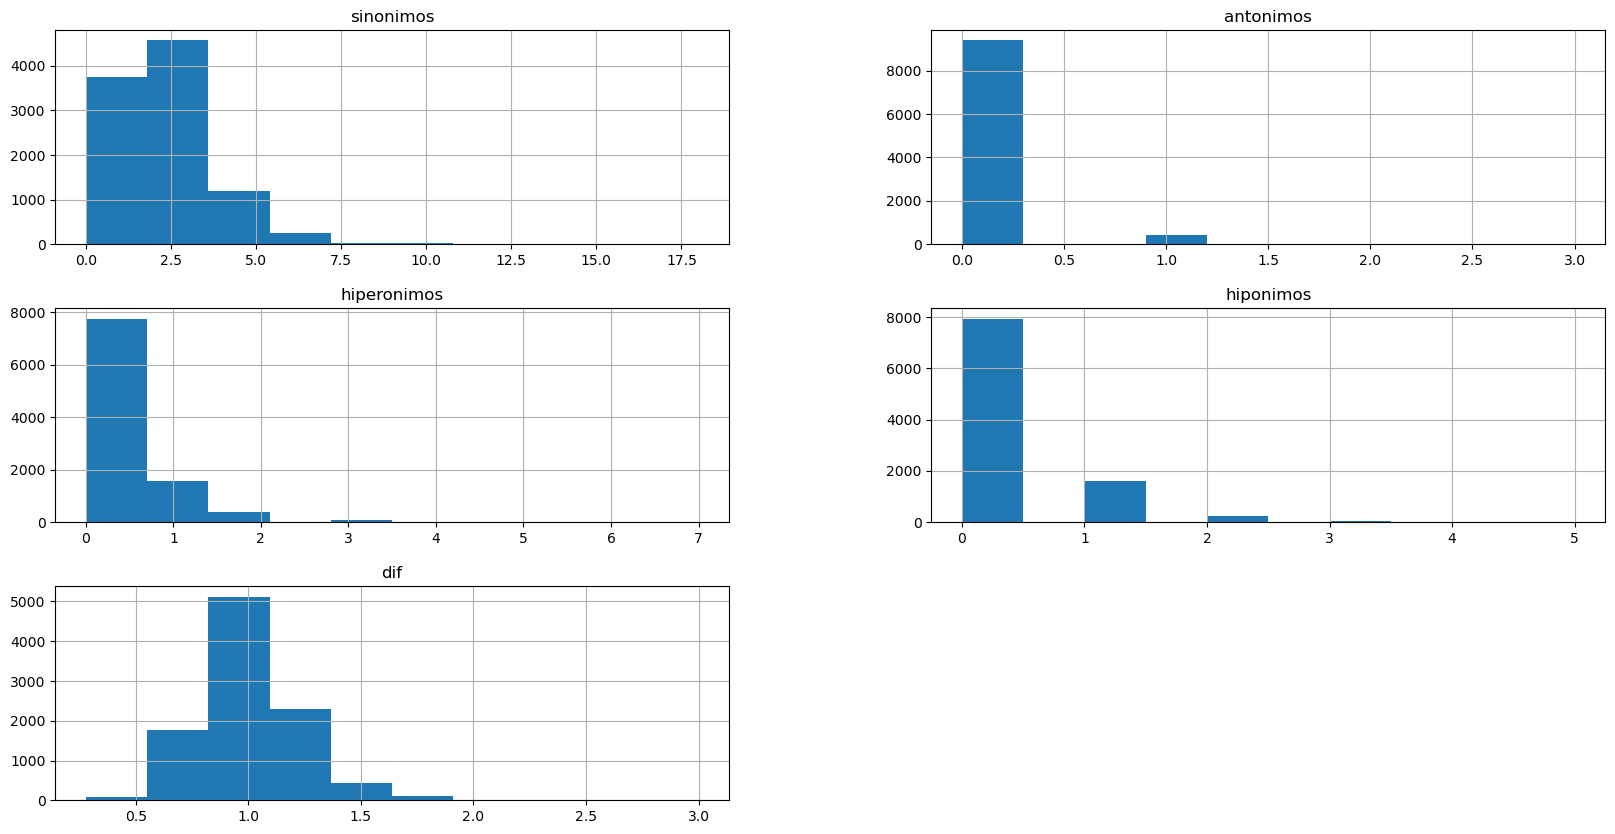

In [243]:
dataframe.hist(figsize=(20,10))
plt.show()

In [244]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [245]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [246]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_2812\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_2812\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(9842, 5)

In [247]:
y_test

array(['neutral', 'entailment', 'contradiction', ..., 'entailment',
       'contradiction', 'neutral'], dtype=object)

In [248]:
y

array(['neutral', 'entailment', 'contradiction', ..., 'entailment',
       'contradiction', 'neutral'], dtype=object)

In [249]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [250]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [251]:
model.decision_function(X)

array([[-0.84956318,  0.48795119,  0.361612  ],
       [-0.55761754,  0.42998528,  0.12763226],
       [ 0.08399655, -0.03805405, -0.0459425 ],
       ...,
       [-0.19815809,  0.22727282, -0.02911473],
       [-0.20710032,  0.0237093 ,  0.18339102],
       [-0.20980535,  0.01160693,  0.19819842]])

In [252]:
labels=dataframe.columns[1:]

In [253]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [254]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [255]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  1 hiperonimos 0 antonimos
Entailment  0 antonimos 1 hiperonimos
Neutral  3 dif 1 hiperonimos


In [256]:
labels

Index(['antonimos', 'hiperonimos', 'hiponimos', 'dif', 'CLASS'], dtype='object')

In [257]:
entailment

array([ 0.24130536, -0.38005542,  0.24111758, -0.17925033,  0.10733936])

In [258]:
n_columns=dataframe.shape[1]-1

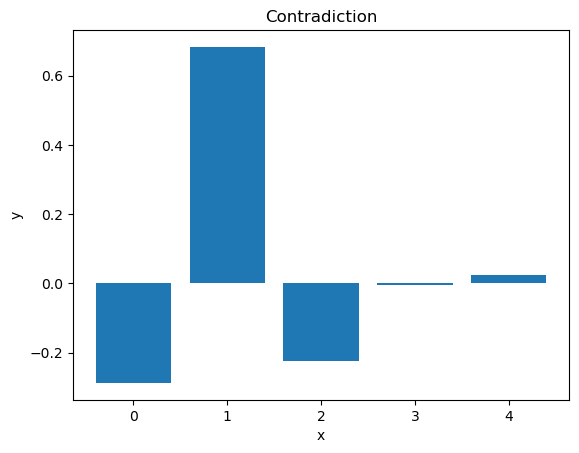

In [259]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

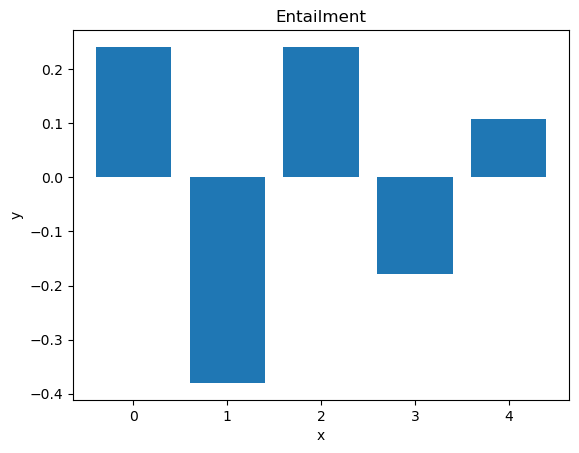

In [260]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

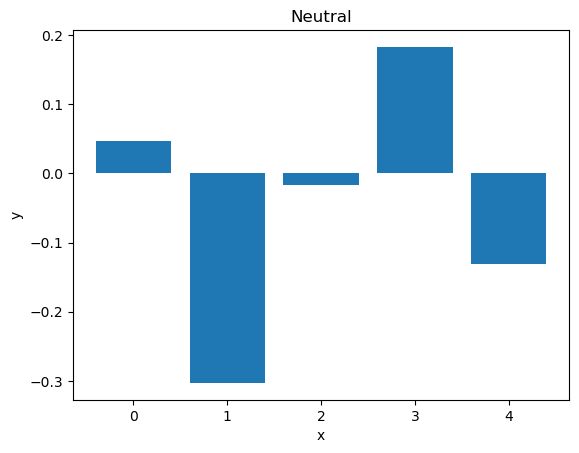

In [261]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [262]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'contradiction' ... 'entailment' 'neutral'
 'neutral']


In [263]:
y

array(['neutral', 'entailment', 'contradiction', ..., 'entailment',
       'contradiction', 'neutral'], dtype=object)

In [264]:
X

array([[5.        , 0.        , 0.        , 1.        , 0.76190476],
       [4.        , 0.        , 0.        , 0.        , 0.8       ],
       [1.        , 0.        , 1.        , 0.        , 0.9375    ],
       ...,
       [2.        , 0.        , 1.        , 0.        , 1.16129032],
       [2.        , 0.        , 1.        , 1.        , 0.93478261],
       [2.        , 0.        , 1.        , 1.        , 0.8220339 ]])

In [265]:
model.score(X,y)

0.4525502946555578

In [266]:
print(confusion_matrix(y, predictions))

[[2184  647  447]
 [1098 1676  555]
 [1532 1109  594]]


In [267]:
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [268]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.452303 (0.026212)


In [269]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.4484509903504317


In [270]:
print(confusion_matrix(Y_validation, predictions))

[[419 130  85]
 [204 336 113]
 [340 214 128]]


In [271]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.44      0.66      0.52       634
   entailment       0.49      0.51      0.50       653
      neutral       0.39      0.19      0.25       682

     accuracy                           0.45      1969
    macro avg       0.44      0.45      0.43      1969
 weighted avg       0.44      0.45      0.42      1969



In [272]:
#X_new = pd.DataFrame()
#model.predict(X_new)